In [1]:
!rm -rf /content/Split_data

In [4]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [6]:
training_data_path =  '/content/Split_data/Train/Group_1'
validation_data_path = '/content/Split_data/Validation/Group_1'

In [7]:
os.listdir(training_data_path)

['Baked Potato', 'Donut', 'Crispy Chicken']

In [8]:
os.listdir(validation_data_path)

['Baked Potato', 'Donut', 'Crispy Chicken']

In [10]:
os.listdir(training_data_path+'/Donut')

['Donut (1318).jpeg',
 'Donut (823).jpeg',
 'Donut (747).jpeg',
 'Donut (1301).jpeg',
 'Donut (1465).jpeg',
 'Donut (1192).jpeg',
 'Donut (784).jpeg',
 'Donut (1473).jpeg',
 'Donut (1295).jpeg',
 'Donut (1326).jpeg',
 'Donut (817).jpeg',
 'Donut (582).jpeg',
 'Donut (1112).jpeg',
 'Donut (134).jpeg',
 'Donut (993).jpeg',
 'Donut (1245).jpeg',
 'Donut (1146).jpeg',
 'Donut (875).jpeg',
 'Donut (1338).jpeg',
 'Donut (415).jpeg',
 'Donut (90).jpeg',
 'Donut (706).jpeg',
 'Donut (884).jpeg',
 'Donut (360).jpeg',
 'Donut (542).jpeg',
 'Donut (301).jpeg',
 'Donut (767).jpeg',
 'Donut (1032).jpeg',
 'Donut (1302).jpeg',
 'Donut (1258).jpeg',
 'Donut (1308).jpeg',
 'Donut (511).jpeg',
 'Donut (904).jpeg',
 'Donut (1111).jpeg',
 'Donut (591).jpeg',
 'Donut (661).jpeg',
 'Donut (1002).jpeg',
 'Donut (732).jpeg',
 'Donut (13).jpg',
 'Donut (528).jpeg',
 'Donut (885).jpeg',
 'Donut (1176).jpeg',
 'Donut (85).jpeg',
 'Donut (922).jpeg',
 'Donut (55).jpg',
 'Donut (721).jpeg',
 'Donut (1439).jpeg',


In [11]:
os.listdir(training_data_path+'/Crispy Chicken')

['Crispy Chicken-Train (669).jpeg',
 'Crispy Chicken-Train (424).jpeg',
 'Crispy Chicken-Train (495).jpeg',
 'Crispy Chicken-Train (503).jpeg',
 'Crispy Chicken-Train (148).jpeg',
 'Crispy Chicken-Train (803).jpeg',
 'Crispy Chicken-Train (744).jpeg',
 'Crispy Chicken-Train (519).jpeg',
 'Crispy Chicken-Train (1197).jpeg',
 'Crispy Chicken-Train (1337).jpeg',
 'Crispy Chicken-Train (250).jpeg',
 'Crispy Chicken-Train (1138).jpeg',
 'Crispy Chicken-Train (1217).jpeg',
 'Crispy Chicken-Train (1388).jpeg',
 'Crispy Chicken-Train (158).jpeg',
 'Crispy Chicken-Train (1128).jpeg',
 'Crispy Chicken-Train (1220).jpeg',
 'Crispy Chicken-Train (847).jpeg',
 'Crispy Chicken-Train (1421).jpeg',
 'Crispy Chicken-Train (653).jpeg',
 'Crispy Chicken-Train (218).jpeg',
 'Crispy Chicken-Train (525).jpeg',
 'Crispy Chicken-Train (294).jpeg',
 'Crispy Chicken-Train (905).jpeg',
 'Crispy Chicken-Train (124).jpeg',
 'Crispy Chicken-Train (272).jpeg',
 'Crispy Chicken-Train (1299).jpeg',
 'Crispy Chicken-Tr

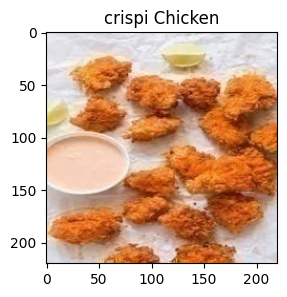

In [12]:
plt.figure(figsize=(5,3))
plt.title('crispi Chicken')
Baked_potato = plt.imread(training_data_path + '/Crispy Chicken/Crispy Chicken-Train (1002).jpeg')
plt.imshow(Baked_potato)
plt.show()

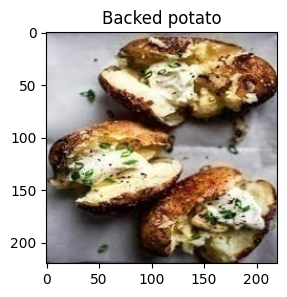

In [13]:
plt.figure(figsize=(5,3))
plt.title('Backed potato')
Donut = plt.imread(training_data_path + '/Baked Potato/Baked Potato-Train (1065).jpeg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [16]:
labels = ['Baked Potato', 'Donut', 'Crispy Chicken']

In [17]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [18]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import ResNet50

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [25]:
num_classes = 3

resnet50_model = ResNet50(input_shape=(256, 256, 3),
                          weights='imagenet',
                          include_top=False)

for layer in resnet50_model.layers:
    layer.trainable = False

x = Flatten()(resnet50_model.output)
h1_out = Dense(128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(16, kernel_initializer='he_uniform', activation='relu')(h1_out)
output = Dense(num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

model = Model(inputs=resnet50_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
resnet50_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [28]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 700ms/step - accuracy: 0.2809 - loss: 2.2367 - val_accuracy: 0.3333 - val_loss: 1.1463
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 397ms/step - accuracy: 0.3278 - loss: 1.1141 - val_accuracy: 0.3333 - val_loss: 1.1081
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 522ms/step - accuracy: 0.3350 - loss: 1.1058 - val_accuracy: 0.3333 - val_loss: 1.1022
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.3277 - loss: 1.1019 - val_accuracy: 0.3417 - val_loss: 1.0985
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - accuracy: 0.3357 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 549ms/step - accuracy: 0.3737 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.3521 - loss: 1.0971 - val_accuracy: 0.3917 - val_loss: 1.0978
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step - accuracy: 0.4185 - loss: 1.0964 - val_accuracy: 

**test_model**

In [29]:
import cv2

In [30]:
labels

['Baked Potato', 'Donut', 'Crispy Chicken']

In [31]:
train_input_data.class_indices

{'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}

In [32]:
def fun(path):
    global model, train_input_data

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # train_input_data.class_indices gives {'Taco': 0, 'Pizza': 1, 'Baked_potato': 2}
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


Group class mapping: {'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}
Model output probabilities: [[0.439 0.181 0.38 ]]
Predicted class index: 0
Predicted label: Baked Potato



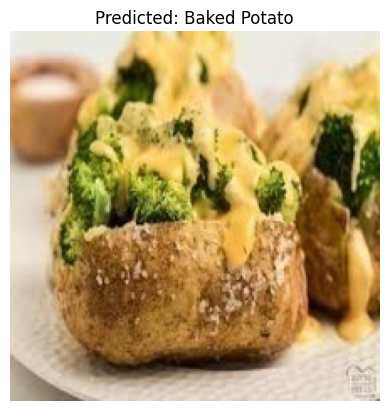

In [33]:
fun('/content/Split_data/Train/Group_1/Baked Potato/Baked Potato-Train (1012).jpeg')


Group class mapping: {'Baked Potato': 0, 'Donut': 1, 'Crispy Chicken': 2}
Model output probabilities: [[0.372 0.311 0.316]]
Predicted class index: 0
Predicted label: Baked Potato



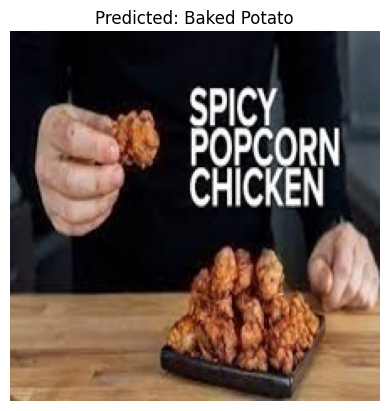

In [34]:
fun('/content/Split_data/Train/Group_1/Crispy Chicken/Crispy Chicken-Train (1054).jpeg')

In [35]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [36]:
test_data_path = '/content/Split_data/Test/Group_1'

In [37]:
labels = ['Baked Potato', 'Donut', 'Crispy Chicken']

In [38]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [39]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step


In [40]:
from sklearn.metrics import classification_report, accuracy_score

In [41]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [42]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [43]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

                precision    recall  f1-score   support

  Baked Potato       0.36      0.97      0.53        40
         Donut       0.67      0.20      0.31        40
Crispy Chicken       0.00      0.00      0.00        40

      accuracy                           0.39       120
     macro avg       0.34      0.39      0.28       120
  weighted avg       0.34      0.39      0.28       120



In [44]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.3917


In [45]:
from tensorflow.keras.models import load_model
model.save('/content/resnet50_group1_.h5')
model = load_model('/content/resnet50_group1_.h5')